# 《零基础学机器学习》U3练习

学习使用sklearn回归算法进行微信广告收益预测


In [72]:
import numpy as np 
import pandas as pd 

data = pd.read_csv("./data/u3_ad/advertising.csv")
print(data.shape)

# print(data.head())
y = data.sales.values
X = data.drop(['sales'], axis = 1)


print(X.shape)
print("X.head", X.head())

print(y.shape)
print("\n \n Y 的值:\n", y)



(200, 4)
(200, 3)
X.head    wechat  weibo  others
0   304.4   93.6   294.4
1  1011.9   34.4   398.4
2  1091.1   32.8   295.2
3    85.5  173.6   403.2
4  1047.0  302.4   553.6
(200,)

 
 Y 的值:
 [ 9.7 16.7 17.3  7.  22.1 17.2 16.1  5.7 11.3  9.4 17.1  4.8  7.2 22.4
 13.4 11.  10.1 16.7 12.2 12.3 10.9 18.9 20.7 11.9 15.  12.9 10.5 15.9
 19.6 17.1 11.3  9.2 14.7 13.2  8.4 12.  16.7 20.1  5.6  6.6 24.4 18.
 17.1 23.7  8.7 20.7 14.6 11.9 16.9  7.6  7.3  7.2  9.6 19.6  9.7 20.8
 17.3 12.6 16.9 17.4 26.2 20.9 17.  11.5 18.4 21.2 22.6 11.  18.2 18.
 25.5 10.3 14.6 20.6  1.6 17.2  7.3 12.9 23.8 12.  24.2 17.7 16.7 11.9
 19.7 21.8 15.6 20.  13.6 12.  19.2 23.2  3.2 16.6 25.4 20.5 15.3  9.5
 20.2 17.  16.6  8.5  5.9  5.3 17.5 10.1 11.8 20.7 17.8 17.6 27.  17.5
  5.5 16.4 20.9 17.4 16.7 14.  14.  10.4  5.3 13.2 20.9 11.3 10.3 10.6
 15.2 16.  17.6 20.2 22.6 18.4 19.7 19.8 11.6 16.8 10.1 14.2 15.   8.
 12.4 19.8 11.6 21.7 16.  16.6 22.2 17.2 22.3 25.4 12.6 11.  18.4 10.8
 18.9  8.7 16.5 17.9 19.  10.

In [63]:
# 线形回归

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
#print(pred)

#print(y_test)
score = model.score(X_test, y_test)
print("Line回归{:.2f}".format(score*100))

Line回归86.90


# 岭回归

参考文档：https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression



In [64]:

from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
#print(reg.coef_)

#print(reg.intercept_)

pred_reg = reg.predict(X_test)
#print(pred_reg)
score2 = reg.score(X_test, y_test)
print("Ridge{:.2f}".format(score2*100))


Ridge86.90


# 学习使用Lasso Regression 套索回归进行预测


In [65]:

from sklearn import linear_model
lasso = linear_model.Lasso(alpha=42)
lasso.fit(X_train, y_train)
pred_lass = lasso.predict(X_test)

# print(lasso.score(X_test, y_test))

score2 = lasso.score(X_test, y_test)
print("Lasso准确率{:.2f}".format(score2*100))

Lasso准确率86.41


In [66]:
print(len(pred_lass))

x = np.array(range(1, len(pred_lass)+1, 1))

print(x)

40
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


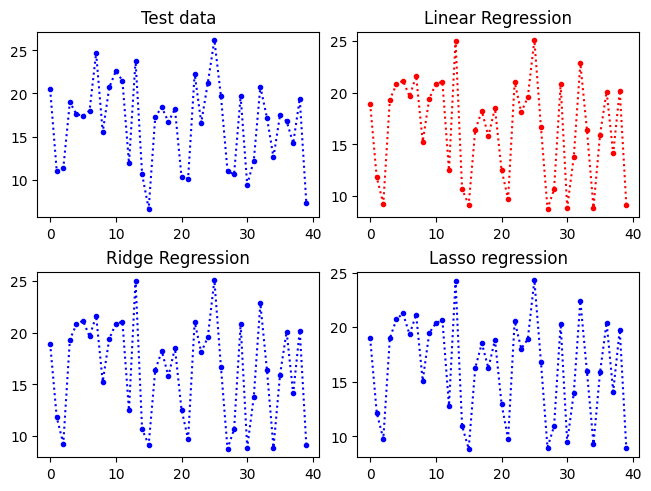

In [67]:
# 最后把几个回归的数据展示出来

import matplotlib.pyplot as plt

# 这里设置限制图形之间的间距
fig, axs = plt.subplots(nrows=2, ncols=2, layout='constrained')
plt.subplot(2, 2, 1)
plt.plot(y_test,  '.:b')
plt.title("Test data")

plt.subplot(2, 2, 2)
plt.plot(pred, '.:r')
plt.title("Linear Regression")

plt.subplot(2, 2, 3)
plt.plot(pred_reg, '.:b')
plt.title("Ridge Regression")

plt.subplot(2, 2, 4)
plt.plot(pred_lass, '.:b')
plt.title("Lasso regression")
plt.show()


# print(pred)
# print(pred_reg)
# print(pred_lass)